In [1]:
%pylab inline

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [57]:
nengo.version.version_info

(2, 7, 1)

In [55]:
import nengo
import numpy as np

I =-.5
epsilon=.2
gamma=6.0
beta=0.1

tau=.6
syn = 0.05

def install_tuning_curves(ens):
    """Use ens.seed to set ens.{max_rates, intercepts, gain, bias}."""
    rng = np.random.RandomState(ens.seed)
    ens.max_rates = ens.max_rates.sample(ens.n_neurons, rng=rng)
    ens.intercepts = ens.intercepts.sample(ens.n_neurons, rng=rng)
    ens.gain, ens.bias = ens.neuron_type.gain_bias(
        ens.max_rates, ens.intercepts)

model = nengo.Network(label='Relaxation Oscillator')
with model:
    inp = nengo.Node(I)
    oscillator = nengo.Ensemble(n_neurons= 150,
                                dimensions=2,
                                radius=4) #nengo.LIFRate(tau_rc=0.02, tau_ref=0.002))

    install_tuning_curves(oscillator)
    print(oscillator.neuron_type.rates(np.ones((1,)), oscillator.gain, oscillator.bias).shape)
    
     # osc to osc connection
    def feedback(x):
        x,y = x
        dx =  3 * x - x**3 + 2 - y
        dy = epsilon * (gamma * (1 + np.tanh(x / beta)) - y)
        return [tau*dx+x,tau*dy+y]
    nengo.Connection(oscillator, oscillator, function=feedback, synapse=syn)
    # inp to osc connection
    nengo.Connection(inp,oscillator[0], transform = tau)
    
    p_osc = nengo.Probe(oscillator, synapse=0.01)

(150L,)


In [17]:
with nengo.Simulator(model) as sim:
    sim.run(1.0)


Building finished in 0:00:01.                                                   
Simulating finished in 0:00:01.                                                 


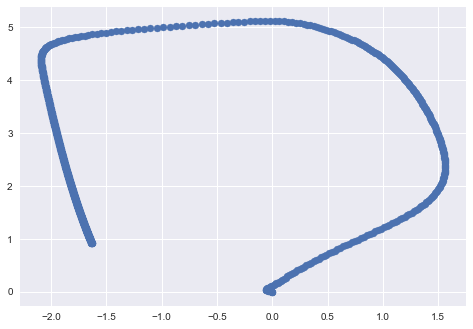

In [18]:
pylab.figure()
pylab.scatter(*sim.data[p_osc].T)
pylab.show()